In [1]:
import pandas
import utils

df = pandas.read_csv("../data/survey2024_headerscleaned.csv")

In [2]:
short_colnames = {
    "in-person workshops on how to teach bioimage analysis workflows": "in-person\nteaching\nworkshops",
    "in-person workshop on new bioimage analysis software tools": "in-person\nsoftware\nworkshops",
    "online events discussing image data infrastructure and image data management": "online\ndata\nmanagement",
    "online events on new bioimage analysis software tools":"online\nanalysis\ntools",
    "online events from companies demonstrating their software":"online\ncompany\ndemos",
    "sessions presenting open bioimage analysis questions, annotated data sets, and an overview explanation of the biology of the data": "seminars\non data and\n questions",
    "provide basic knowledge and vocabulary of new developments in bioimage analysis for better communication between computer scientists, life scientists, imaging specialists and software developers": "introductory\nmaterials",
    "open discussion forum and interaction platform": "open\nforum",
    "publishing and curating training materials": "publishing\ntraining\nmaterials",
}
long_colnames = {
    f"Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [{k}]": v
    for k, v in short_colnames.items()
}

utils.normalized_percent_graphs(
    df, long_colnames, "../figures/WhatShouldWeDo.png", prints=True, xlabel="Interest"
)
utils.normalized_percent_graphs(
    df, long_colnames, "../figures/WhatShouldWeDo.svg", prints=True, xlabel="Interest"
)

Original shape: (294, 53)
Shape after filtering: (291, 53)
(275, 53) Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [in-person workshops on how to teach bioimage analysis workflows]
maybe interested                   121
definitely would want to attend    111
not at all interested               43
Name: count, dtype: int64
(281, 53) Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [in-person workshop on new bioimage analysis software tools]
definitely would want to attend    135
maybe interested                   126
not at all interested               20
Name: count, dtype: int64
(283, 53) Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [online events discussing image data infrastructure and image data management]
definitely would want to attend    133
maybe interested                   126
not at all interested  

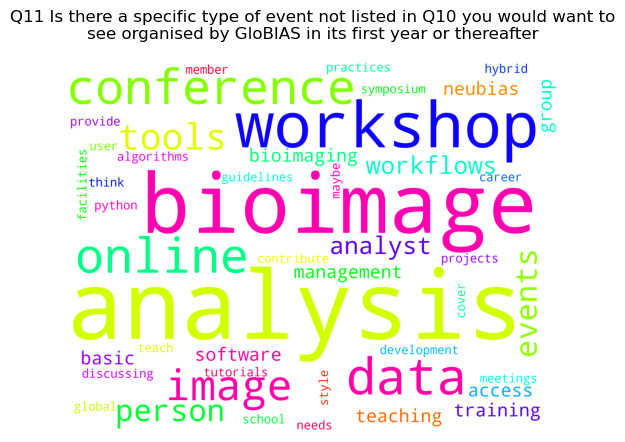

In [3]:
col_name = "Q11 Is there a specific type of event not listed in Q10 you would want to see organised by GloBIAS in its first year or thereafter"
utils.wordcloud_func(
    col_name,
    [],
    "../figures/WhatShouldWeDoNotListed.png",
    df,
    colormap="hsv",
    width=2400,
    height=1800,
    max_words=50,
    collocations=False,
    relative_scaling=1,
)
utils.wordcloud_func(
    col_name,
    [],
    "../figures/WhatShouldWeDoNotListed.svg",
    df,
    colormap="hsv",
    width=2400,
    height=1800,
    max_words=50,
    collocations=False,
    relative_scaling=1,
)

## Is there a correlation between the interest in having basic knowledge events and career stage or age?

Amongst the topics in which applicants were asked to expressed the level of interest, one was:
`provide basic knowledge and vocabulary of new developments in bioimage analysis for better communication between computer scientists, life scientists, imaging specialists and software developers": "introductory\nmaterials"`
During our discussions we were wondering if the interested expressed in this topic might be influenced by the stage of the career of the applicant as experts might be less interested in having this type of events.

In [3]:
col_name = 'Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [provide basic knowledge and vocabulary of new developments in bioimage analysis for better communication between computer scientists, life scientists, imaging specialists and software developers]'
selected_df = df[df[col_name].str.contains("a")][["What is your age group", "Which of these describe your position Choose all options that apply", col_name]]
selected_df.rename(columns={"What is your age group": "age_group", 
                            "Which of these describe your position Choose all options that apply": "positions", 
                            col_name: "interest_level"},
                    inplace=True)
selected_df.dropna(subset=["positions"], inplace=True)
selected_df["positions"] = selected_df["positions"].apply(lambda x: ", ".join(set(filter(None, x.lower().replace(', ', ',').split(',')))))

<Axes: xlabel='age_group'>

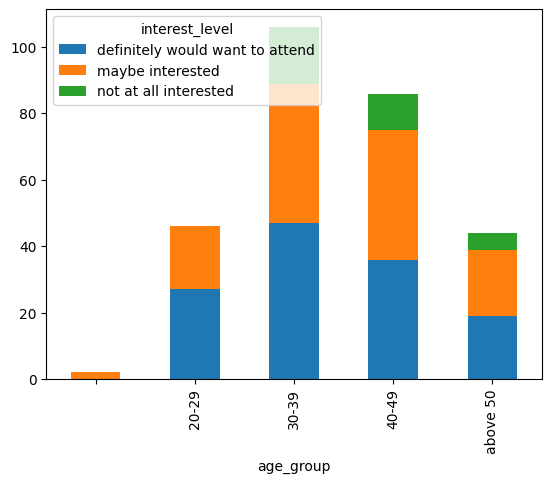

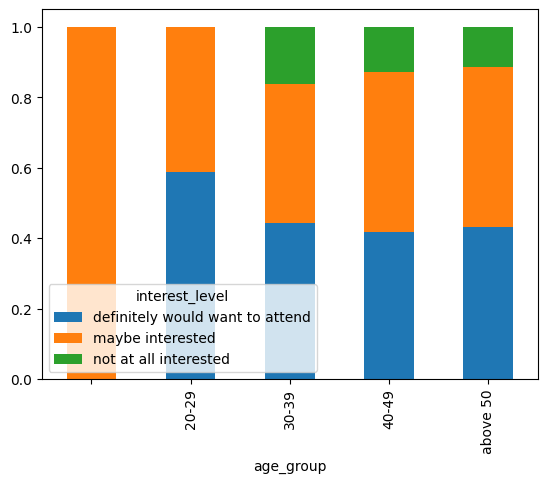

In [4]:
selected_df.groupby("age_group")["interest_level"].value_counts().unstack().plot(kind="bar", stacked=True)
selected_df.groupby("age_group")["interest_level"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)

<Axes: xlabel='positions'>

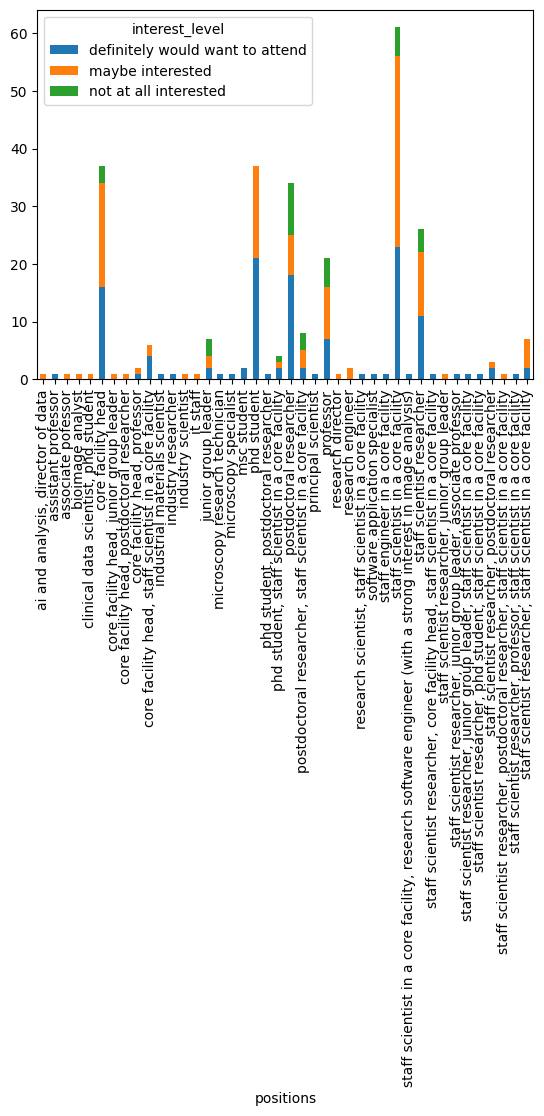

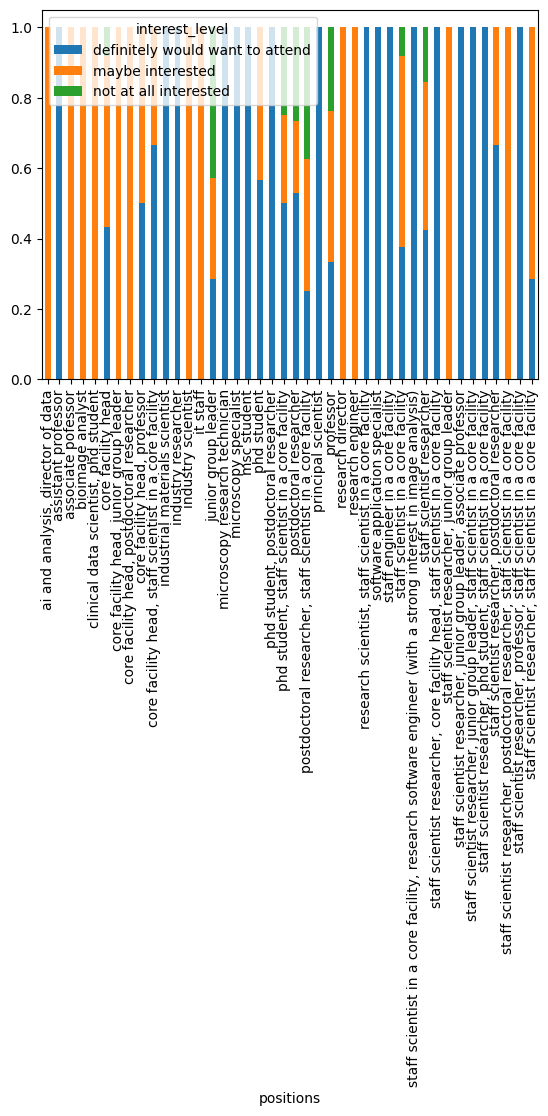

In [5]:
selected_df.groupby("positions")["interest_level"].value_counts().unstack().plot(kind="bar", stacked=True)
selected_df.groupby("positions")["interest_level"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)

Let's use the career stage defined in `career_stage_by_region` notebook.

In [6]:
# map answers into estimated seniority level

# pre-postdoc
junior_positions = [
    "phd student", 
    "msc student", 
    "postgraduate student"
]

# postdoc to junior PI/assistant prof
midcareer_positions = [
    "junior group leader",
    "assistant professor",
    "postdoc",
    "postdoctoral researcher"
]

# associate prof+
leadership_positions = [
    "associate pofessor",
    "associate professor",
    "core facility head", 
    "professor",
    "director of data",
    "research director",
    "principal scientist",
    ]

# typically contain one or more of 
# {engineer, scientist, researcher, specialist, staff}
# but do not contain {manager, director, <other indication of seniority>}
staff_positions = [
    "clinical data scientist",
    "research software engineer",
    "research software engineer (with a strong interest in image analysis)",
    "industry scientist",
    "staff scientist researcher",
    "staff scientist researcher,",
    "microscopy research technician",
    "industrial materials scientist",
    "software application specialist",
    "bioimage analyst",
    "industry researcher",
    "it staff",
    "ai and analysis",
    "microscopy specialist",
    "research scientist",
    "staff scientist researcher",
    "research engineer",
    "staff scientist in a core facility",
    "staff engineer in a core facility",
]

def get_career_stages(position):
    if len(position) > 1:
        stages = set([get_career_stages([p]) for p in position])
        if len(stages) > 1:
            return f"mixed ({', '.join(stages)})"
        return stages.pop()
    else:
        position = position[0]
        if position.lower() in junior_positions:
            return "junior"
        if position.lower() in midcareer_positions:
            return "midcareer"
        if position.lower() in leadership_positions:
            return "leadership"
        if position.lower() in staff_positions:
            return "staff"
        return "unknown"
    
selected_df["career_stage"] = selected_df["positions"].apply(lambda x: get_career_stages(x.split(', ')))

<Axes: xlabel='career_stage'>

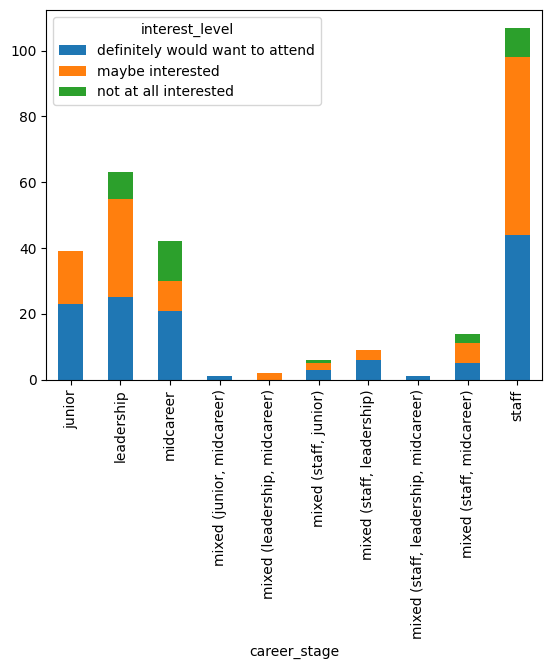

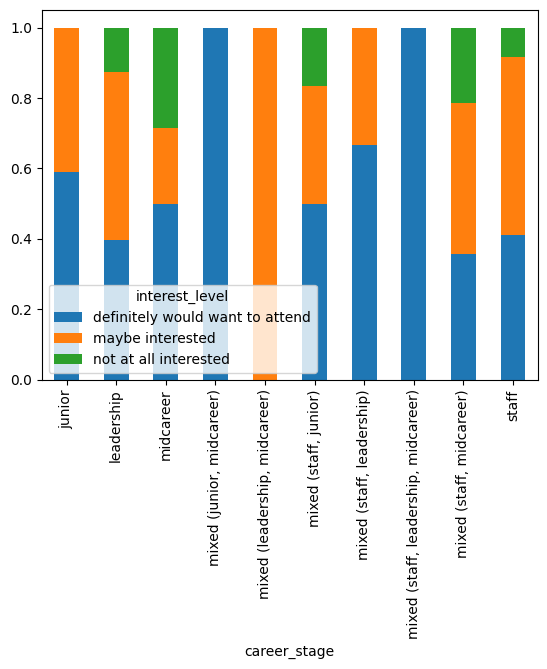

In [7]:
selected_df.groupby("career_stage")["interest_level"].value_counts().unstack().plot(kind="bar", stacked=True)
selected_df.groupby("career_stage")["interest_level"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)

Applicants at a more junior stage are more interested in basic knowledge events.
Many midcareer applicants applicants have stated that they are not at all interested in basic knowledge events.
Less applicants at a leadership stage have stated that they would definitely attend, in a similar proportion as applicants in staff career stage.